<a href="https://colab.research.google.com/github/jeromeslash83/Data-Science/blob/main/NBA_Rankings_Dataset_Regular_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an exercise in doing sports analytics using NBA data. The dataset I will be using will be early 2021 NBA Season Dataset and I will be ranking the top 25 players in that time period AKA who is deserving of the MVP and also the top 5 for each position. You can access the dataset [here](https://www.kaggle.com/datasets/umutalpaydn/nba-20202021-season-player-stats)

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 150) #so I can display a max of 150 rows if I want to. Not necessarily needed.
pd.set_option('display.max_columns', None) #to display all the columns in the dataset.
print('Initialization Successful')

Initialization Successful


I will be using 2 datasets here, the per_game metrics and the advanced metrics. These metrics will be used in assessing which are the top NBA players of this season.



In [ ]:
advanced_metrics = pd.read_csv('/content/drive/MyDrive/Data/NBA/2021 Season/nba2021_advanced.csv')

per_game = pd.read_csv('/content/drive/MyDrive/Data/NBA/2021 Season/nba2021_per_game.csv')

# Per Game Data

In [ ]:
per_game.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,2.6,4.4,0.590,0.590,1.3,2.4,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,0.2,1.0,0.167,0.125,0.0,0.0,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,3.5,5.7,0.606,0.603,1.1,2.3,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,7.3,12.7,0.576,0.576,5.1,6.0,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,4.6,8.8,0.525,0.529,0.9,1.2,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1
5,Ty-Shon Alexander,SG,22,PHO,3,0,2.7,0.0,1.0,0.000,0.0,0.3,0.000,0.0,0.7,0.000,0.000,0.0,0.0,0.000,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,0.0
6,Nickeil Alexander-Walker,SG,22,NOP,23,3,19.2,3.3,8.2,0.410,1.0,3.8,0.276,2.3,4.4,0.525,0.473,1.1,1.4,0.781,0.2,2.4,2.7,2.0,1.1,0.3,1.3,1.7,8.8
7,Grayson Allen,SG,25,MEM,19,8,23.9,3.2,7.4,0.429,2.3,5.3,0.436,0.8,2.1,0.410,0.586,1.7,1.9,0.892,0.4,2.5,2.9,2.1,1.0,0.2,1.1,1.3,10.4
8,Jarrett Allen,C,22,TOT,28,10,26.2,4.4,6.8,0.642,0.0,0.1,0.250,4.3,6.6,0.651,0.645,3.6,4.7,0.758,2.9,6.1,9.0,1.6,0.5,1.6,1.5,1.6,12.3
9,Jarrett Allen,C,22,BRK,12,5,26.7,3.7,5.4,0.677,0.0,0.0,0.000,3.7,5.4,0.677,0.677,3.8,5.1,0.754,3.2,7.3,10.4,1.7,0.6,1.6,1.8,1.8,11.2


In [ ]:
per_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  497 non-null    object 
 1   Pos     497 non-null    object 
 2   Age     497 non-null    int64  
 3   Tm      497 non-null    object 
 4   G       497 non-null    int64  
 5   GS      497 non-null    int64  
 6   MP      497 non-null    float64
 7   FG      497 non-null    float64
 8   FGA     497 non-null    float64
 9   FG%     497 non-null    float64
 10  3P      497 non-null    float64
 11  3PA     497 non-null    float64
 12  3P%     497 non-null    float64
 13  2P      497 non-null    float64
 14  2PA     497 non-null    float64
 15  2P%     497 non-null    float64
 16  eFG%    497 non-null    float64
 17  FT      497 non-null    float64
 18  FTA     497 non-null    float64
 19  FT%     497 non-null    float64
 20  ORB     497 non-null    float64
 21  DRB     497 non-null    float64
 22  TR

# Advanced Metrics

In [ ]:
advanced_metrics.head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,10.5,19.8,15.4,6.8,1.4,3.8,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,0.0,18.2,9.4,13.4,0.0,0.0,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,16.9,18.0,17.5,10.1,1.7,2.0,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,6.8,23.2,15.4,27.9,1.4,3.2,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,3.2,14.0,8.4,11.4,0.7,2.8,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2
5,Ty-Shon Alexander,SG,22,PHO,3,8,-11.9,0.000,0.333,0.000,0.0,13.6,6.9,14.7,0.0,0.0,0.0,16.8,-0.1,0.0,-0.1,-0.327,-16.4,-4.8,-21.2,0.0
6,Nickeil Alexander-Walker,SG,22,NOP,23,441,12.0,0.502,0.463,0.170,1.3,14.1,7.7,14.9,2.8,1.9,12.9,22.4,-0.2,0.4,0.2,0.025,-2.6,0.1,-2.5,-0.1
7,Grayson Allen,SG,25,MEM,19,454,14.0,0.630,0.721,0.264,1.7,12.0,6.7,11.5,2.0,0.6,11.3,16.5,0.7,0.4,1.1,0.113,0.4,0.1,0.5,0.3
8,Jarrett Allen,C,22,TOT,28,734,22.5,0.695,0.021,0.695,12.6,25.5,19.1,9.0,0.9,5.5,14.8,17.1,2.3,0.8,3.1,0.203,2.3,0.4,2.7,0.9
9,Jarrett Allen,C,22,BRK,12,320,21.3,0.730,0.000,0.938,14.2,28.8,21.9,8.2,1.0,4.9,19.3,15.4,1.0,0.4,1.4,0.210,1.3,0.6,1.9,0.3


In [ ]:
advanced_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  497 non-null    object 
 1   Pos     497 non-null    object 
 2   Age     497 non-null    int64  
 3   Tm      497 non-null    object 
 4   G       497 non-null    int64  
 5   MP      497 non-null    int64  
 6   PER     497 non-null    float64
 7   TS%     497 non-null    float64
 8   3PAr    497 non-null    float64
 9   FTr     497 non-null    float64
 10  ORB%    497 non-null    float64
 11  DRB%    497 non-null    float64
 12  TRB%    497 non-null    float64
 13  AST%    497 non-null    float64
 14  STL%    497 non-null    float64
 15  BLK%    497 non-null    float64
 16  TOV%    497 non-null    float64
 17  USG%    497 non-null    float64
 18  OWS     497 non-null    float64
 19  DWS     497 non-null    float64
 20  WS      497 non-null    float64
 21  WS/48   497 non-null    float64
 22  OB

# Check for null values

In [ ]:
check_null = {'pg': per_game.isnull().sum(),
              'advanced metrics': advanced_metrics.isnull().sum()}

check_null

{'pg': Player    0
 Pos       0
 Age       0
 Tm        0
 G         0
 GS        0
 MP        0
 FG        0
 FGA       0
 FG%       0
 3P        0
 3PA       0
 3P%       0
 2P        0
 2PA       0
 2P%       0
 eFG%      0
 FT        0
 FTA       0
 FT%       0
 ORB       0
 DRB       0
 TRB       0
 AST       0
 STL       0
 BLK       0
 TOV       0
 PF        0
 PTS       0
 dtype: int64,
 'advanced metrics': Player    0
 Pos       0
 Age       0
 Tm        0
 G         0
 MP        0
 PER       0
 TS%       0
 3PAr      0
 FTr       0
 ORB%      0
 DRB%      0
 TRB%      0
 AST%      0
 STL%      0
 BLK%      0
 TOV%      0
 USG%      0
 OWS       0
 DWS       0
 WS        0
 WS/48     0
 OBPM      0
 DBPM      0
 BPM       0
 VORP      0
 dtype: int64}

There are no null values in this dataset which is good.

### There are duplicated names in the rows of data because some players were traded during the season so I will have to group the data by player and aggregate some of the metrics. This will take a long time. Here's what I will do. I will separate the players with duplicates because of the trades and make a separate dataset for them. Then, I will do weighted averages for those players so that we can get the accurate average for them in the season.


In [ ]:
player_dup = per_game[per_game.duplicated('Player', keep = False)]
player_dup

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
8,Jarrett Allen,C,22,TOT,28,10,26.2,4.4,6.8,0.642,0.0,0.1,0.250,4.3,6.6,0.651,0.645,3.6,4.7,0.758,2.9,6.1,9.0,1.6,0.5,1.6,1.5,1.6,12.3
9,Jarrett Allen,C,22,BRK,12,5,26.7,3.7,5.4,0.677,0.0,0.0,0.000,3.7,5.4,0.677,0.677,3.8,5.1,0.754,3.2,7.3,10.4,1.7,0.6,1.6,1.8,1.8,11.2
10,Jarrett Allen,C,22,CLE,16,5,25.9,4.9,7.8,0.624,0.1,0.3,0.250,4.8,7.6,0.636,0.628,3.4,4.4,0.761,2.8,5.2,7.9,1.6,0.4,1.7,1.3,1.4,13.2
181,James Harden,SG,31,TOT,24,24,37.6,7.6,15.8,0.482,3.0,7.9,0.384,4.6,7.9,0.579,0.578,6.2,6.9,0.897,0.8,6.5,7.3,11.3,1.0,0.8,4.3,2.3,24.5
182,James Harden,SG,31,HOU,8,8,36.3,7.5,16.9,0.444,3.1,9.0,0.347,4.4,7.9,0.556,0.537,6.6,7.5,0.883,0.6,4.5,5.1,10.4,0.9,0.8,4.3,1.8,24.8
183,James Harden,SG,31,BRK,16,16,38.3,7.7,15.3,0.502,3.0,7.4,0.407,4.7,7.9,0.591,0.600,5.9,6.6,0.905,0.8,7.6,8.4,11.8,1.1,0.8,4.3,2.6,24.3
255,Rodions Kurucs,SF-PF,22,TOT,14,0,5.2,0.4,1.4,0.300,0.2,1.0,0.214,0.2,0.4,0.500,0.375,0.1,0.1,0.500,0.1,0.7,0.9,0.3,0.4,0.1,0.5,0.6,1.1
256,Rodions Kurucs,PF,22,BRK,5,0,3.2,0.2,0.6,0.333,0.2,0.4,0.500,0.0,0.2,0.000,0.500,0.0,0.0,0.000,0.0,0.6,0.6,0.4,0.0,0.0,0.0,0.2,0.6
257,Rodions Kurucs,SF,22,HOU,9,0,6.3,0.6,1.9,0.294,0.2,1.3,0.167,0.3,0.6,0.600,0.353,0.1,0.2,0.500,0.2,0.8,1.0,0.2,0.6,0.2,0.8,0.8,1.4
265,Alex Len,C,27,TOT,20,6,14.6,2.4,3.8,0.627,0.3,1.0,0.316,2.1,2.8,0.732,0.667,1.0,1.7,0.588,0.8,2.8,3.5,1.1,0.4,1.1,1.2,1.9,6.0


### Turns out there are total metrics for each traded player so I would just go with the total metrics of the player and remove their duplicates.

In [ ]:
per_game_tot = per_game.drop_duplicates(subset='Player', keep='first')
advanced_metrics_tot = advanced_metrics.drop_duplicates(subset='Player', keep='first')

# Merging the Datasets together

In [ ]:
advanced_metrics_tot.drop(columns = 'MP', inplace=True)

df_nba = pd.merge(per_game_tot, advanced_metrics_tot, on=['Player',	'Pos',	'Age',	'Tm',	'G'], how='left')

<ipython-input-10-e61888539482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advanced_metrics_tot.drop(columns = 'MP', inplace=True)


In [ ]:
df_nba.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,2.6,4.4,0.590,0.590,1.3,2.4,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5,15.1,0.599,0.000,0.541,10.5,19.8,15.4,6.8,1.4,3.8,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,0.2,1.0,0.167,0.125,0.0,0.0,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3,-6.9,0.125,0.250,0.000,0.0,18.2,9.4,13.4,0.0,0.0,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,3.5,5.7,0.606,0.603,1.1,2.3,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0,15.9,0.592,0.006,0.397,16.9,18.0,17.5,10.1,1.7,2.0,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,7.3,12.7,0.576,0.576,5.1,6.0,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9,22.7,0.641,0.015,0.469,6.8,23.2,15.4,27.9,1.4,3.2,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,4.6,8.8,0.525,0.529,0.9,1.2,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1,15.2,0.542,0.298,0.093,3.2,14.0,8.4,11.4,0.7,2.8,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [ ]:
df_nba.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'MP_total',
       'FG_per36', 'FGA_per36', 'FG%_per36', '3P_per36', '3PA_per36',
       '3P%_per36', '2P_per36', '2PA_per36', '2P%_per36', 'FT_per36',
       'FTA_per36', 'FT%_per36', 'ORB_per36', 'DRB_per36', 'TRB_per36',
       'AST_per36', 'STL_per36', 'BLK_per36', 'TOV_per36', 'PF_per36',
       'PTS_per36', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

### Now I have merged all the data into one, I will do data validation first then do the Analysis after.

In [ ]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 480
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     481 non-null    object 
 1   Pos        481 non-null    object 
 2   Age        481 non-null    int64  
 3   Tm         481 non-null    object 
 4   G          481 non-null    int64  
 5   GS         481 non-null    int64  
 6   MP         481 non-null    float64
 7   FG         481 non-null    float64
 8   FGA        481 non-null    float64
 9   FG%        481 non-null    float64
 10  3P         481 non-null    float64
 11  3PA        481 non-null    float64
 12  3P%        481 non-null    float64
 13  2P         481 non-null    float64
 14  2PA        481 non-null    float64
 15  2P%        481 non-null    float64
 16  eFG%       481 non-null    float64
 17  FT         481 non-null    float64
 18  FTA        481 non-null    float64
 19  FT%        481 non-null    float64
 20  ORB       

In [ ]:
df_nba.isnull().sum()

Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
MP_total     0
FG_per36     0
FGA_per36    0
FG%_per36    0
3P_per36     0
3PA_per36    0
3P%_per36    0
2P_per36     0
2PA_per36    0
2P%_per36    0
FT_per36     0
FTA_per36    0
FT%_per36    0
ORB_per36    0
DRB_per36    0
TRB_per36    0
AST_per36    0
STL_per36    0
BLK_per36    0
TOV_per36    0
PF_per36     0
PTS_per36    0
PER          0
TS%          0
3PAr         0
FTr          0
ORB%         0
DRB%         0
TRB%         0
AST%         0
STL%         0
BLK%         0
TOV%         0
USG%         0
OWS          0
DWS          0
WS           0
WS/48     

In [ ]:
df_nba[df_nba.duplicated()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP_total,FG_per36,FGA_per36,FG%_per36,3P_per36,3PA_per36,3P%_per36,2P_per36,2PA_per36,2P%_per36,FT_per36,FTA_per36,FT%_per36,ORB_per36,DRB_per36,TRB_per36,AST_per36,STL_per36,BLK_per36,TOV_per36,PF_per36,PTS_per36,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP


### Now that I have checked the data and found out that there are no problems with the merged data. I will now do my Analysis

In [ ]:
df_nba.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,25.598753,18.738046,8.773389,19.676923,3.257380,7.116008,0.437202,1.017464,2.806445,0.300844,2.242827,4.313306,0.488091,0.507015,1.370062,1.778170,0.691630,0.812058,2.809979,3.620582,1.997089,0.605821,0.414137,1.122869,1.659252,8.895634,12.590644,0.538252,0.405817,0.271266,4.896466,15.381913,10.143867,13.285447,1.418295,2.029730,13.418711,18.673805,0.464657,0.431601,0.893347,0.067410,-1.606861,-0.566320,-2.175884,0.184615
std,4.064982,8.265263,10.425160,9.874278,2.475596,5.042285,0.128528,0.937831,2.310975,0.164055,1.966129,3.579262,0.156328,0.147266,1.444421,1.745184,0.252303,0.763585,1.927710,2.506428,1.914624,0.425695,0.435612,0.871957,0.847547,6.853062,7.415332,0.131657,0.235469,0.271087,4.664575,7.204164,5.075945,9.188620,0.857563,2.395814,9.514394,5.886614,0.786500,0.386112,1.042292,0.119344,4.502172,1.740662,5.444305,0.496962
min,19.000000,1.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-1.200000,-0.100000,-0.800000,-1.128000,-40.100000,-9.200000,-47.100000,-0.700000
25%,22.000000,13.000000,0.000000,11.200000,1.400000,3.100000,0.389000,0.200000,0.800000,0.250000,0.800000,1.500000,0.431000,0.468000,0.400000,0.600000,0.619000,0.300000,1.300000,1.800000,0.700000,0.300000,0.100000,0.500000,1.000000,3.700000,9.400000,0.500000,0.255000,0.139000,1.800000,10.800000,6.500000,7.100000,0.900000,0.600000,9.300000,14.400000,0.000000,0.100000,0.100000,0.030000,-3.200000,-1.500000,-3.800000,-0.100000
50%,25.000000,20.000000,3.000000,19.800000,2.700000,5.800000,0.444000,0.800000,2.300000,0.337000,1.600000,3.200000,0.506000,0.526000,0.900000,1.200000,0.759000,0.600000,2.600000,3.200000,1.400000,0.600000,0.300000,0.900000,1.700000,7.200000,12.600000,0.556000,0.418000,0.225000,3.300000,14.100000,9.100000,10.700000,1.400000,1.300000,11.900000,17.900000,0.200000,0.400000,0.600000,0.084000,-1.300000,-0.500000,-1.600000,0.000000
75%,28.000000,26.000000,18.000000,28.100000,4.700000,10.100000,0.500000,1.600000,4.300000,0.396000,3.200000,6.000000,0.575000,0.576000,1.800000,2.400000,0.848000,1.100000,3.800000,5.000000,2.600000,0.900000,0.600000,1.500000,2.200000,12.600000,16.500000,0.607000,0.569000,0.313000,6.600000,19.100000,12.700000,17.800000,1.900000,2.700000,15.600000,22.300000,0.700000,0.700000,1.300000,0.128000,0.800000,0.400000,0.400000,0.300000
max,37.000000,30.000000,30.000000,37.600000,11.400000,24.000000,1.000000,5.000000,11.800000,1.000000,9.400000,16.600000,1.000000,1.500000,9.700000,11.300000,1.000000,4.600000,9.900000,14.000000,11.300000,2.000000,3.500000,5.000000,4.100000,32.800000,38.700000,1.500000,1.000000,2.667000,35.000000,54.100000,28.000000,47.500000,7.500000,21.300000,100.000000,41.300000,4.900000,2.100000,6.300000,0.342000,14.100000,7.100000,18.000000,3.400000


This dataset covers only a total of 30 games max. I did not know at first since there were no indication on how many games were played in the kaggle dataset.

This is what we can see in the data.
> Count: The total number of players included in the dataset. Here, you have data for 481 players.

> Mean: The average value for each statistic across all players throughout the league. For example, the average Age is approximately 25.6 years, and the average points per game (PTS) is around 8.9.

> Standard Deviation (std): This measures the amount of variation or dispersion in the data. A low standard deviation means the data points are close to the mean, while a high standard deviation means they are spread out over a wider range.

> Min: The smallest value in each column. For example, the minimum Age is 19, and the minimum PTS is 0, which indicates players with very limited to no playing time.

> 25th Percentile: This is the value below which 25% of the data falls. For PTS, it is 3.7, meaning 25% of the players score less than 3.7 points per game.

> 50th Percentile (Median): The middle value of the dataset. For points: Half the players have a score below 7.2 points per game, and the other half score above 7.2 points per game.

> 75th Percentile: This is the value below which 75% of the data falls. For PTS, it is 12.6, meaning 75% of the players score less than 12.6 points per game.

> Max: The largest value in each column. For example, the maximum Age is 37, and the maximum PTS is 32.8 per game, which might be representative of the leading scorers in the league.

# Distribution of common NBA Metrics to assess players.

Points, Assists, Rebounds, Steals, Blocks.

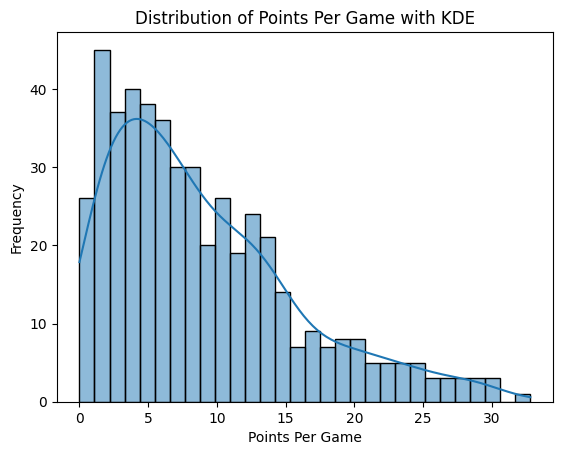

In [ ]:
sns.histplot(df_nba['PTS'], bins=30, kde=True)
plt.title('Distribution of Points Per Game with KDE')
plt.xlabel('Points Per Game')
plt.ylabel('Frequency')
plt.show()

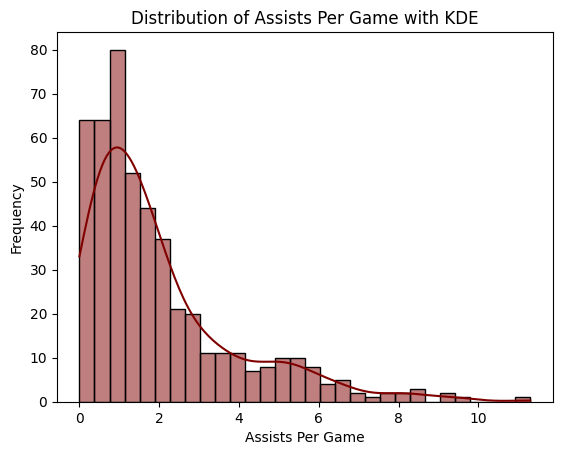

In [ ]:
sns.histplot(df_nba['AST'], bins=30, kde=True, color='maroon')
plt.title('Distribution of Assists Per Game with KDE')
plt.xlabel('Assists Per Game')
plt.ylabel('Frequency')
plt.show()

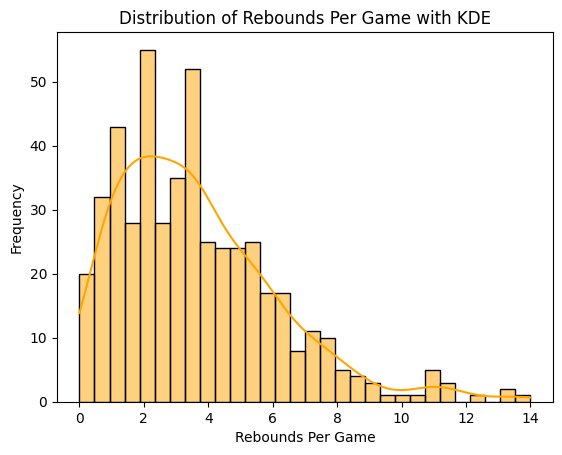

In [ ]:
sns.histplot(df_nba['TRB'], bins=30, kde=True, color='orange')
plt.title('Distribution of Rebounds Per Game with KDE')
plt.xlabel('Rebounds Per Game')
plt.ylabel('Frequency')
plt.show()

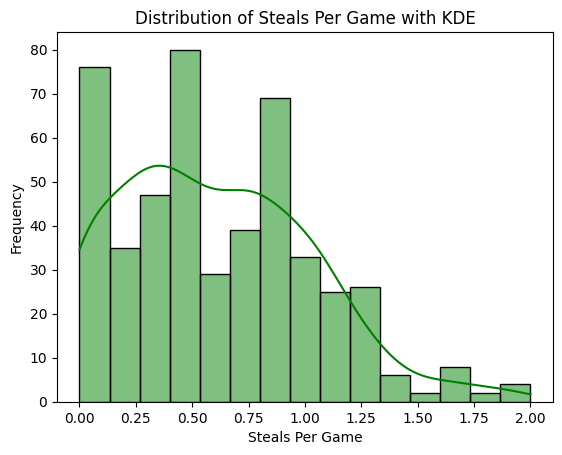

In [ ]:
sns.histplot(df_nba['STL'], bins=15, kde=True, color = 'green')
plt.title('Distribution of Steals Per Game with KDE')
plt.xlabel('Steals Per Game')
plt.ylabel('Frequency')
plt.show()

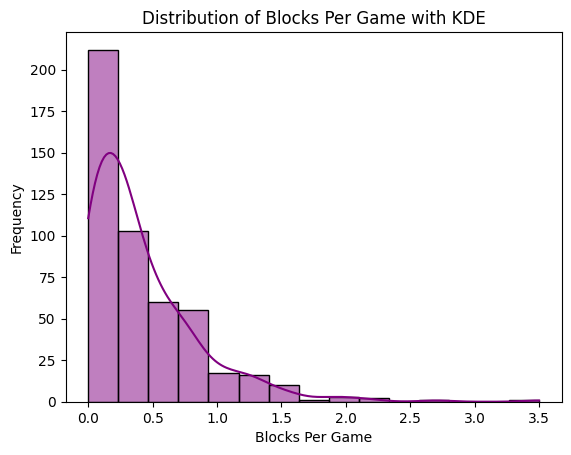

In [ ]:
sns.histplot(df_nba['BLK'], bins=15, kde=True, color='purple')
plt.title('Distribution of Blocks Per Game with KDE')
plt.xlabel('Blocks Per Game')
plt.ylabel('Frequency')
plt.show()

As we can see, all datas are skewed to the right. This will be beneficial for what should we do to normalize the data for our composite score.

<ipython-input-21-9051c3a76644>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_nba.corr()


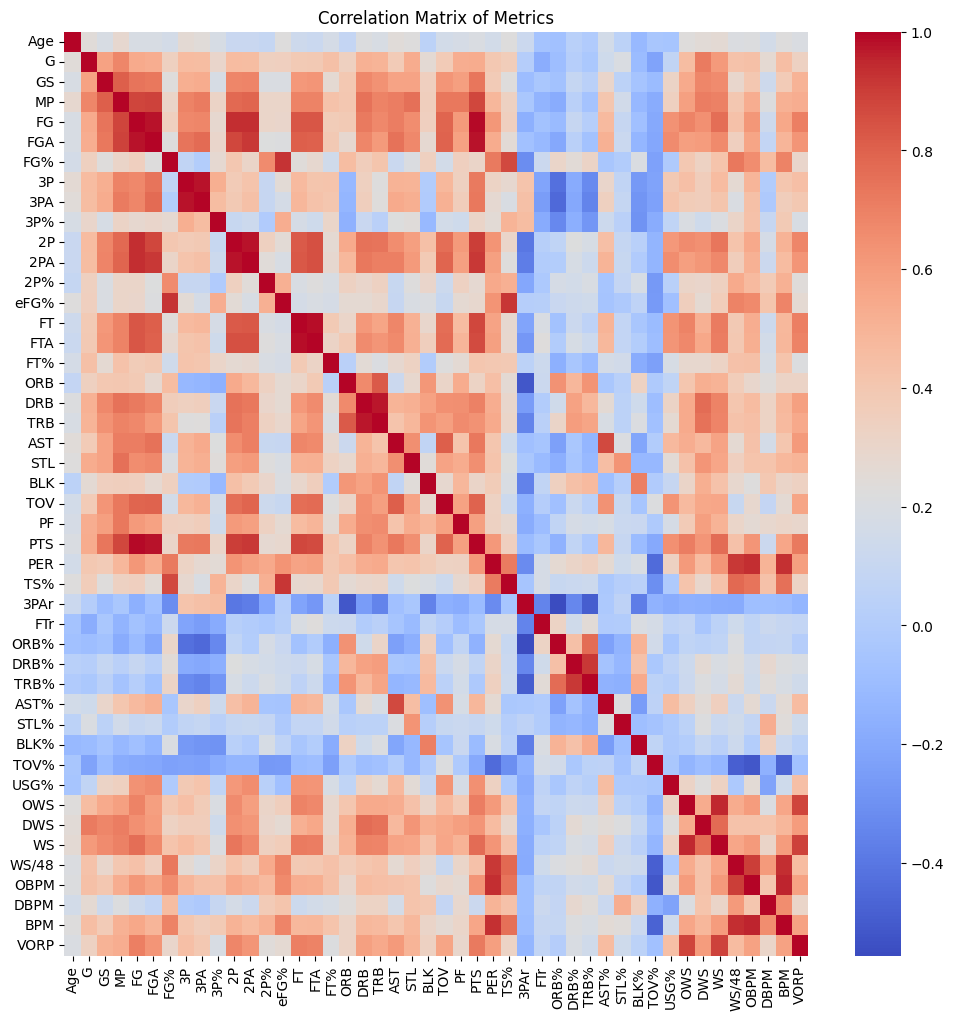

In [ ]:
corr_matrix = df_nba.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Metrics')
plt.show()

# Ranking

#### I will now rank the players I will first Normalize the dataset. Based on the  analysis of data, Z-score standardization will be employed for several key reasons:

* **Comparability:** It was imperative to standardize different statistics to the same scale to enable direct comparison, as the dataset includes a variety of metrics such as rates and counts that are originally on different scales.

* **Handling Skewed Data:** The NBA data exhibits performance outliers, which are common in sports statistics. Z-score standardization mitigates the influence of these outliers, ensuring that they do not disproportionately affect the analysis.

* **Weight of Influence:** To construct a composite score from multiple metrics, it's essential that each metric contributes equally. Standard scaling ensures that metrics with larger ranges do not unduly dominate the composite score.

* **Outlier Identification:** After standardization, outliers are more readily identifiable. Values significantly above or below the mean, typically by more than two or three standard deviations, are clearly distinguished as outliers, facilitating cleaner and more robust analysis.

## Weights

I have decided on the weights of the dataset and their percentages and here are my reasons.

* **Scoring (PTS, 10%):** Points per game is a direct measure of a player's offensive contribution. It is a fundamental metric, hence the significant weight.

* **Shooting Efficiency (TS%, 10%):** True shooting percentage is a measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws. It's weighted equally with points to emphasize not just volume scoring, but efficient scoring.

* **Overall Player Efficiency (PER, 10%):** Player Efficiency Rating summarizes a player's contributions and effectiveness into a single figure. It's a comprehensive metric, deserving a high weight.

* **Playmaking Ability (AST, AST%, 5% each):** Assists reflect a player's ability to set up teammates for scoring opportunities. Both the volume (AST) and the rate (AST%) are included but at a lower weight because not all positions contribute equally in this area.

* **Rebounding (TRB, TRB%, 10% and 5% respectively):** Rebounds are critical to both offense and defense, capturing possession of the ball. Total rebounds (TRB) are given more weight than the rebounding rate (TRB%) because actual contributions on the board are a priority.

* **Defensive Metrics (DWS, DBPM, STL, BLK, 10%, 5%, 5%, 5% respectively):** Defensive Win Shares indicate the player's defensive impact on winning games, while Defensive Box Plus/Minus provides an estimate of a player's defensive performance relative to league average. Steals and blocks are individual defensive actions that can change the course of a game.

* **Offensive Impact (OWS, 10%):** Offensive Win Shares reflect a player's overall offensive contribution to the team's success, deserving a high weight due to its impact on winning games.

* **Win Shares (WS, 10%):** This combines offensive and defensive win shares and represents an estimate of the number of wins contributed by a player, serving as a comprehensive measure of a player's impact on the team's success.

* **Overall Impact (BPM, VORP, 5% and 10% respectively):** Box Plus/Minus estimates the overall impact of a player per 100 possessions, while Value Over Replacement Player accounts for the player's contribution over a replacement-level player. VORP is given a higher weight because it relates the player's performance to what's typical in the league.



In [ ]:
weights = {
    'PTS': 0.1, 'TS%': 0.1, 'PER': 0.1, 'AST': 0.05, 'AST%': 0.05,
    'TRB': 0.1, 'TRB%': 0.05, 'DWS': 0.1, 'DBPM': 0.05, 'STL': 0.05,
    'BLK': 0.05, 'OWS': 0.1, 'WS': 0.1, 'BPM': 0.05, 'VORP': 0.1
}

In [ ]:
from sklearn.preprocessing import StandardScaler

features_to_standardize = ['PTS', 'TS%', 'PER', 'AST', 'AST%', 'TRB', 'TRB%', 'DWS', 'DBPM', 'STL', 'BLK', 'OWS', 'WS', 'BPM', 'VORP']

scaler = StandardScaler()

df_nba[features_to_standardize] = scaler.fit_transform(df_nba[features_to_standardize])

In [ ]:
df_nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,2.6,4.4,0.590,0.590,1.3,2.4,0.561,1.3,2.7,0.151536,-0.730454,-0.483998,0.197313,1.0,1.9,-0.349935,0.338753,0.461895,0.000,0.541,10.5,19.8,1.036577,-0.706548,1.4,3.8,16.1,19.7,-0.209572,0.436595,0.006390,0.101,-2.8,0.210668,-0.151530,-0.573307
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,0.2,1.0,0.167,0.125,0.0,0.0,0.000,0.0,0.5,-1.246328,-0.887306,-1.424617,-0.951691,0.0,0.2,-1.255582,-2.631162,-3.142121,0.250,0.000,0.0,18.2,-0.146700,0.012480,0.0,0.0,0.0,19.7,-0.718684,-1.118976,-0.954034,-0.265,-15.6,-2.664793,-3.442792,-0.573307
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,3.5,5.7,0.606,0.603,1.1,2.3,0.468,4.3,4.6,2.108545,0.053806,0.926930,0.427114,1.7,1.9,-0.130827,0.446750,0.408671,0.006,0.397,16.9,18.0,1.450723,-0.347034,1.7,2.0,20.1,12.8,0.935930,0.177333,0.774728,0.109,-0.1,-0.249406,0.197822,0.030990
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,7.3,12.7,0.576,0.576,5.1,6.0,0.841,1.9,7.3,2.228361,1.726893,0.926930,1.346318,3.0,2.6,1.607431,1.364724,0.781239,0.015,0.469,6.8,23.2,1.036577,1.592162,1.4,3.2,16.2,24.6,2.335988,2.251427,2.599532,0.196,2.9,1.475871,1.301038,2.649608
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,4.6,8.8,0.525,0.529,0.9,1.2,0.762,0.8,3.5,0.271352,-0.050762,-0.483998,1.116517,0.9,1.5,0.760213,0.352253,0.028501,0.298,0.093,3.2,14.0,-0.343913,-0.205407,0.7,2.8,6.4,22.3,-0.336850,0.177333,-0.185695,0.075,0.3,-0.249406,0.271370,0.030990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Delon Wright,SG,28,DET,28,23,29.4,3.7,8.1,0.456,0.9,2.4,0.353,2.9,5.7,0.500,0.509,2.2,2.8,0.785,1.1,3.5,0.391169,1.517757,1.867548,0.197313,1.2,1.1,0.234353,0.541248,0.157759,0.298,0.346,4.2,13.9,-0.245306,1.308908,2.4,1.7,11.5,15.6,1.317764,1.214380,1.350982,0.136,1.4,1.130815,0.914913,1.642447
477,Thaddeus Young,PF,32,CHI,23,0,25.7,5.1,8.7,0.587,0.2,0.9,0.238,4.9,7.8,0.628,0.600,0.7,1.5,0.500,2.4,3.4,0.870437,1.256337,1.867548,0.197313,2.0,2.9,0.336604,0.797740,0.446689,0.104,0.169,10.7,14.4,0.484381,1.298014,2.5,1.7,17.9,18.9,0.808652,0.695856,0.870770,0.145,0.8,1.073306,0.786204,0.836718
478,Trae Young,PG,22,ATL,26,26,34.7,7.6,17.7,0.429,2.3,6.2,0.369,5.3,11.5,0.462,0.493,9.0,10.2,0.887,0.7,3.2,0.071658,3.818251,0.456620,-0.262288,4.3,2.0,2.571507,1.391723,0.454292,0.349,0.577,2.2,9.7,-0.817223,3.400625,1.1,0.7,16.2,32.5,2.845100,0.177333,2.119320,0.168,5.8,-0.536952,1.190717,2.448175
479,Cody Zeller,C,28,CHO,15,12,24.1,4.2,8.0,0.525,0.2,1.1,0.188,4.0,6.9,0.577,0.538,1.5,1.9,0.759,2.6,5.4,1.749094,0.262942,0.221466,0.427114,0.9,2.5,0.175924,0.757241,0.233793,0.133,0.242,11.4,24.3,1.490166,0.208578,1.3,2.5,9.5,17.3,0.426818,0.177333,0.294516,0.161,0.4,0.670742,0.583948,0.232422


In [ ]:
df_nba['composite_score'] = df_nba[features_to_standardize].mul(weights).sum(axis=1)

In [ ]:
df_ranked = df_nba.sort_values(by='composite_score', ascending=False)
PG = df_ranked[df_ranked['Pos'] == 'PG']
SG = df_ranked[df_ranked['Pos'] == 'SG']
SF = df_ranked[df_ranked['Pos'] == 'SF']
PF = df_ranked[df_ranked['Pos'] == 'PF']
C= df_ranked[df_ranked['Pos'] == 'C']

In [ ]:
df_ranked['rank'] = range(1, len(df_ranked) + 1)
PG['rank'] = range(1, len(PG) + 1)
SG['rank'] = range(1, len(SG) + 1)
SF['rank'] = range(1, len(SF) + 1)
PF['rank'] = range(1, len(PF) + 1)
C['rank'] = range(1, len(C) + 1)

<ipython-input-37-d7eb3e77b904>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PG['rank'] = range(1, len(PG) + 1)
<ipython-input-37-d7eb3e77b904>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SG['rank'] = range(1, len(SG) + 1)
<ipython-input-37-d7eb3e77b904>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
df_ranked.head(25)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,composite_score,rank
233,Nikola Jokić,C,25,DEN,28,28,35.9,10.5,18.4,0.570,1.5,3.8,0.402,9.0,14.6,0.614,0.611,4.8,5.5,0.871,3.0,8.2,2.987202,3.452264,2.337858,0.427114,3.4,3.1,2.702971,2.539190,0.895290,0.207,0.300,9.3,25.9,1.450723,2.975745,2.2,1.7,14.1,29.4,5.645217,2.510688,5.192674,0.300,9.1,1.648398,2.496190,6.476819,3.634420,1
11,Giannis Antetokounmpo,PF,26,MIL,27,27,33.6,10.3,18.4,0.563,1.1,4.0,0.290,9.2,14.4,0.638,0.594,6.4,9.9,0.642,1.7,9.7,3.107019,1.988313,1.632394,2.035721,3.7,3.1,2.819829,2.120702,0.621567,0.216,0.540,5.6,29.8,1.549330,1.548584,1.8,3.5,13.9,33.0,2.845100,2.769950,3.271828,0.226,5.2,1.475871,1.723938,3.858201,2.739127,2
129,Joel Embiid,C,26,PHI,23,23,32.5,9.4,17.5,0.540,1.2,3.0,0.397,8.3,14.5,0.569,0.573,9.7,11.3,0.851,1.9,8.9,2.867385,0.576645,1.632394,1.805920,3.4,2.5,3.038937,2.458193,0.933307,0.169,0.649,6.7,28.9,1.588772,0.361099,1.9,3.3,13.3,33.6,3.099656,2.251427,3.271828,0.273,6.4,1.188324,1.852647,3.455336,2.587897,3
225,LeBron James,PG,36,LAL,29,29,34.7,9.4,18.8,0.504,2.5,6.7,0.378,6.9,12.1,0.573,0.571,4.2,6.0,0.711,0.6,7.6,1.828972,3.086276,0.926930,0.197313,3.7,1.6,2.454649,1.567218,0.469499,0.355,0.318,2.0,23.6,0.602708,2.736069,1.4,1.3,14.8,31.4,2.335988,3.806997,3.175786,0.200,5.8,1.073306,1.723938,4.261065,2.507344,4
115,Luka Dončić,PG,21,DAL,27,27,35.3,10.0,21.1,0.475,2.4,7.2,0.335,7.6,14.0,0.546,0.532,6.6,8.3,0.795,0.9,7.7,1.988728,3.870535,0.926930,0.656915,4.2,2.2,2.951294,1.918208,0.363051,0.340,0.392,2.7,24.2,0.642151,3.727456,1.4,1.8,14.5,36.0,2.590544,0.955118,2.407447,0.170,6.8,0.900778,1.834260,4.462497,2.391640,5
159,Rudy Gobert,C,28,UTA,29,29,30.3,5.4,8.5,0.640,0.0,0.0,0.000,5.4,8.5,0.642,0.640,3.3,5.8,0.581,3.5,9.9,3.905798,-0.364466,-0.483998,5.252934,1.6,2.2,0.774820,1.432222,0.804049,0.004,0.676,12.9,33.2,2.634000,-0.761020,0.7,7.1,12.8,18.0,2.208710,4.325520,3.271828,0.237,1.7,1.475871,1.062008,2.246743,2.337735,6
179,James Harden,SG,31,TOT,24,24,37.6,7.6,15.8,0.482,3.0,7.9,0.384,4.6,7.9,0.579,0.578,6.2,6.9,0.897,0.8,6.5,1.469521,4.863931,0.926930,0.886716,4.3,2.3,2.279362,1.567218,0.834462,0.500,0.434,2.3,18.5,0.109677,3.422414,1.3,1.7,18.5,26.5,3.608769,1.214380,3.079743,0.220,6.0,0.210668,1.466521,3.253904,2.325079,7
106,Stephen Curry,PG,32,GSW,29,29,34.0,10.0,20.3,0.492,5.0,11.8,0.425,5.0,8.6,0.582,0.614,5.0,5.3,0.935,0.4,4.9,0.670742,2.092880,1.397239,-0.721890,3.2,1.9,3.082759,1.756213,0.933307,0.578,0.261,1.4,14.8,-0.383355,1.973464,1.7,0.2,12.4,32.2,3.354213,1.992165,3.271828,0.210,7.5,0.325686,1.797486,4.462497,2.276448,8
260,Kawhi Leonard,SF,29,LAC,23,23,34.4,9.7,19.0,0.513,1.9,4.9,0.389,7.8,14.1,0.556,0.563,5.3,6.1,0.879,0.8,5.0,0.910376,1.570041,2.808167,0.427114,1.8,1.5,2.600721,2.012705,0.598757,0.259,0.320,2.8,16.0,-0.107258,1.243542,2.5,1.6,7.8,30.2,3.226934,1.732903,3.079743,0.247,5.5,0.728251,1.558456,3.052472,2.132877,9
264,Damian Lillard,PG,30,POR,27,27,35.9,9.2,20.4,0.451,4.1,10.8,0.384,5.1,9.6,0.527,0.553,7.2,7.7,0.933,0.5,3.9,0.311291,2.981708,1.162084,-0.262288,3.1,1.6,3.053544,1.958707,0.659584,0.529,0.379,1.4,12.2,-0.718617,2.496393,1.5,0.7,11.7,32.2,4.754271,-0.341191,3.463912,0.225,7.7,-0.479443,1.558456,3.858201,2.108747,10


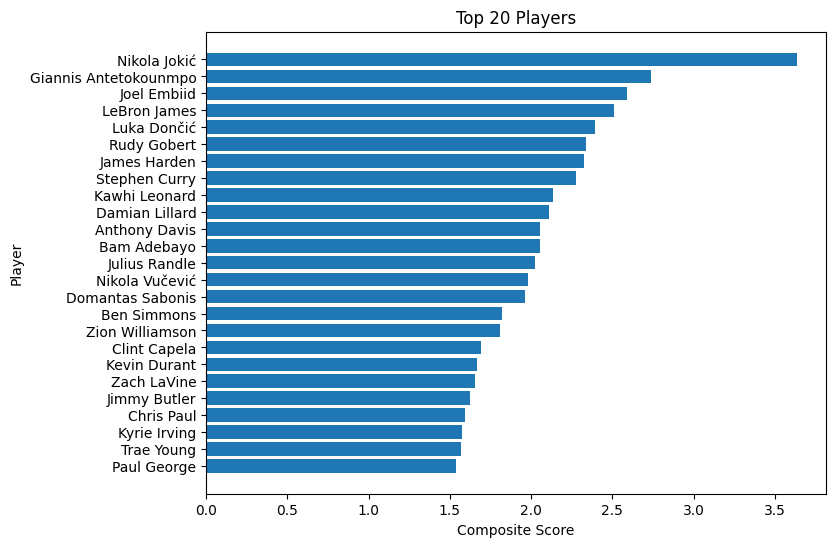

In [ ]:
top_players = df_ranked.head(25)
plt.figure(figsize=(8,6))
plt.barh(top_players['Player'], top_players['composite_score'])
plt.xlabel('Composite Score')
plt.ylabel('Player')
plt.title('Top 20 Players')
plt.gca().invert_yaxis()
plt.show()

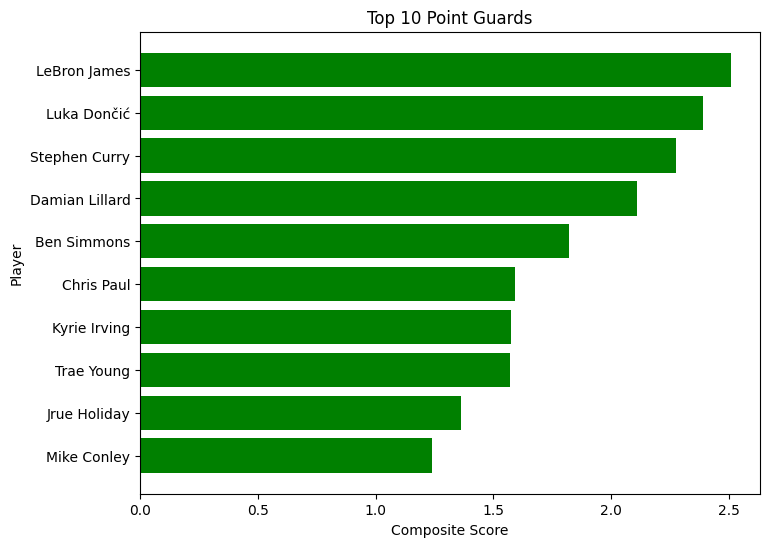

In [ ]:
top_players_PG = PG.head(10)
plt.figure(figsize=(8,6))
plt.barh(top_players_PG['Player'], top_players_PG['composite_score'], color='g')
plt.xlabel('Composite Score')
plt.ylabel('Player')
plt.title('Top 10 Point Guards')
plt.gca().invert_yaxis()
plt.show()

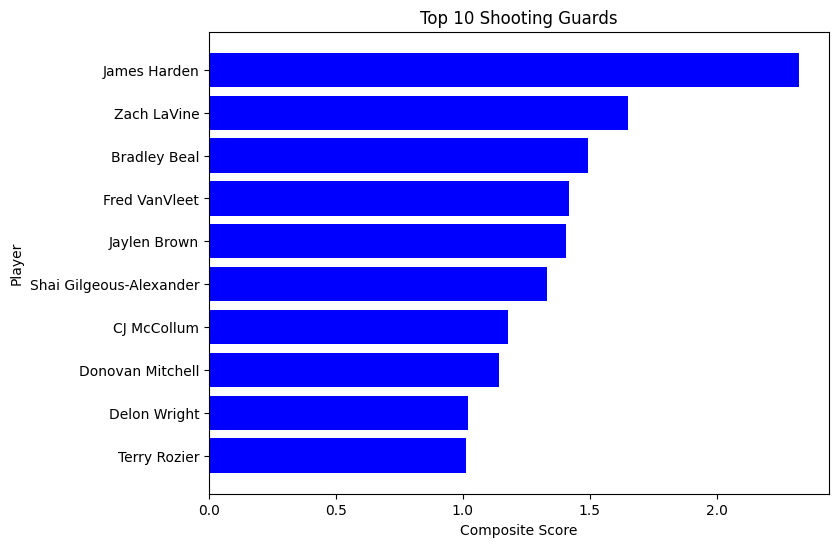

In [ ]:
top_players_SG = SG.head(10)
plt.figure(figsize=(8,6))
plt.barh(top_players_SG['Player'], top_players_SG['composite_score'], color='b')
plt.xlabel('Composite Score')
plt.ylabel('Player')
plt.title('Top 10 Shooting Guards')
plt.gca().invert_yaxis()
plt.show()

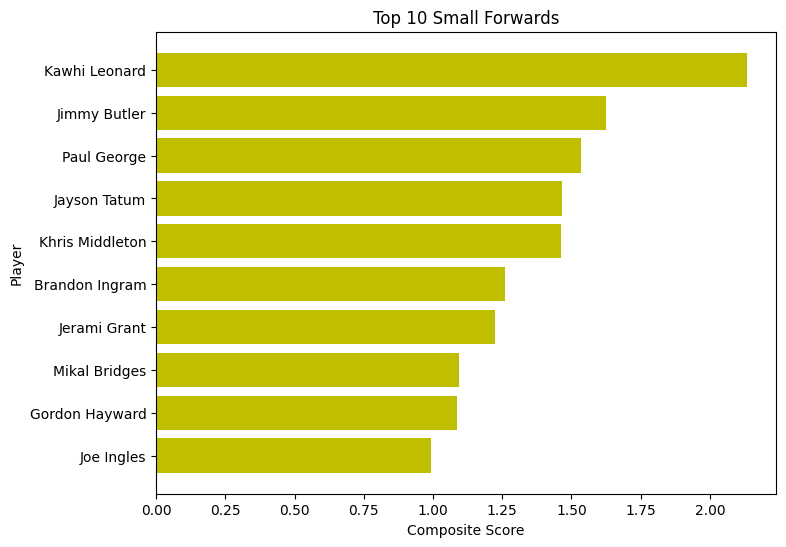

In [ ]:
top_players_SF = SF.head(10)
plt.figure(figsize=(8,6))
plt.barh(top_players_SF['Player'], top_players_SF['composite_score'], color='y')
plt.xlabel('Composite Score')
plt.ylabel('Player')
plt.title('Top 10 Small Forwards')
plt.gca().invert_yaxis()
plt.show()

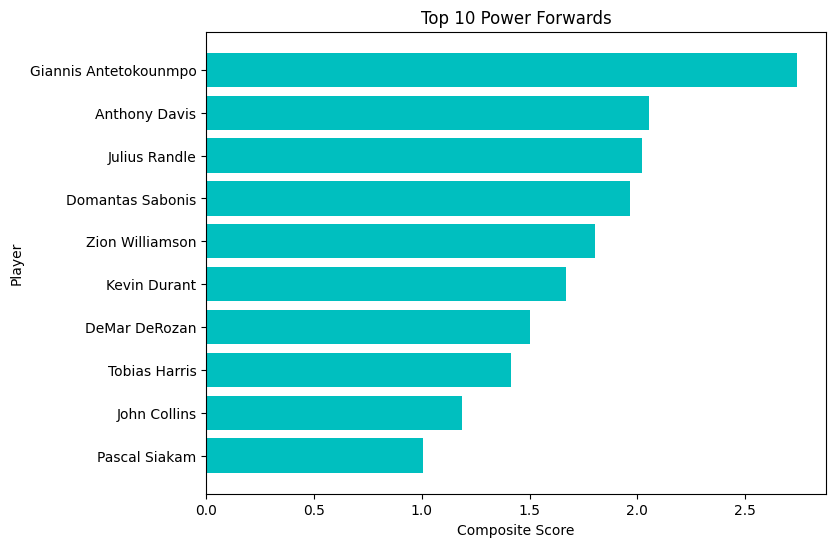

In [ ]:
top_players_PF = PF.head(10)
plt.figure(figsize=(8,6))
plt.barh(top_players_PF['Player'], top_players_PF['composite_score'], color='c')
plt.xlabel('Composite Score')
plt.ylabel('Player')
plt.title('Top 10 Power Forwards')
plt.gca().invert_yaxis()
plt.show()

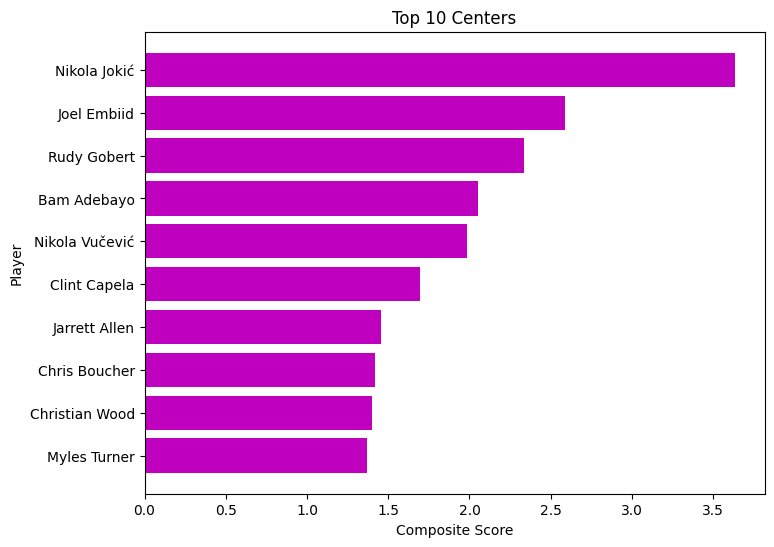

In [ ]:
top_players_C = C.head(10)
plt.figure(figsize=(8,6))
plt.barh(top_players_C['Player'], top_players_C['composite_score'], color='m')
plt.xlabel('Composite Score')
plt.ylabel('Player')
plt.title('Top 10 Centers')
plt.gca().invert_yaxis()
plt.show()

# Results

### Top 20 Players Overall:

> Nikola Jokić is also leader here, indicating his dominance in this part of the season.
Giannis Antetokounmpo, Joel Embiid, LeBron James, and Luka Dončić follow, making up the top five.

> The list continues with Rudy Gobert, James Harden, Stephen Curry, Kawhi Leonard, and Damian Lillard completing the top ten.
The remaining ten include Anthony Davis, Bam Adebayo, Julius Randle, Nikola Vučević, Domantas Sabonis, Ben Simmons, Zion Williamson, Clint Capela, Kevin Durant, Zach LaVine, Jimmy Butler, Chris Paul, Kyrie Irving, Trae Young, and Paul George.

> The top spot also reflected at the end of the season where Jokic took the MVP spot for the first time that season.

## Top 10 Point Guards

> LeBron James, who is often considered a forward, is listed as the top point guard, this was his role during this season, followed by Luka Dončić and Steph Curry.

> Damian Lillard and Ben Simmons are in the fourth and fifth spots, respectively.

> The lower half includes Chris Paul, Kyrie Irving, Trae Young, Jrue Holiday, and Mike Conley.

## Top 10 Shooting Guards:

> James Harden is the clear leader, with Zach LaVine and Bradley Beal following.

> Fred VanVleet and Jaylen Brown are in the middle pack.

> Shai Gilgeous-Alexander, CJ McCollum, Donovan Mitchell, Delon Wright, and Terry Rozier are also featured.

## Top 10 Small Forwards:
> Kawhi Leonard is at the top, with Jimmy Butler and Paul George closely behind.

> Jayson Tatum and Khris Middleton complete the top five.

> The rest of the list includes Brandon Ingram, Jerami Grant, Mikal Bridges, Gordon Hayward, and Joe Ingles.

## Top 10 Power Forwards:
> Giannis Antetokounmpo leads, Anthony Davis follows, and
Julius Randle.

> Domantas Sabonis, and Zion Williamson show strong performances, highlighting their significant contributions to their respective teams.

> Kevin Durant, although traditionally a small forward, showcases his adaptability and high level of play in the power forward position.

> DeMar DeRozan, Tobias Harris, John Collins, and Pascal Siakam complete the top 10.

## Top 10 Centers:
> Nikola Jokić leads significantly, followed by Joel Embiid and Rudy Gobert.

> Bam Adebayo and Nikola Vučević round out the top five.

> The latter half includes Clint Capela, Jarrett Allen, Chris Boucher, Christian Wood, and Myles Turner.

#### The data shows a blend of traditional and modern power forwards, with players like Giannis and Zion representing the athleticism and versatility that's become valuable in today's game, while players like Sabonis echo the traditional big-man skill set with a modern twist.

#### Scoring ability, efficiency, and versatility seem to be significant factors contributing to the composite score for the power forwards, as most of the top-ranked players are known for their offensive prowess as well as their ability to contribute in multiple statistical categories.

#### The inclusion of players like Kevin Durant and DeMar DeRozan, traditionally known for playing other positions, suggests a trend towards positionless basketball, where players are valued for their overall impact rather than being confined to traditional positional roles.

# Final Statements

> This analysis provides a comprehensive look at the top NBA players of the first 30 games of 2020-2021 regular season across all positions, using a data-driven approach to rank them based on a composite score. The method employed considers various performance metrics, suggesting a holistic evaluation of a player's contribution to the game.

> Also, the analysis reflects the evolving nature of basketball positions, with a clear trend towards versatility and overall impact. The rankings show a league where the traditional roles are expanding, and players are increasingly evaluated on a diverse set of skills rather than just position-specific attributes.

> The top players in each position, according to the composite score, are not only statistical leaders but also key figures who likely influence the outcome of games and, by extension, their teams' success in the season. Although the analysis for this is limited to just at most 30 games, these rankings offer valuable insights and a solid foundation for discussions about player impact and value in the NBA. The rankings obviously changed a lot after the season but I can say that even in the beginning of the season, based on the metrics, Jokic deserved to win his first MVP that year.

I learned a lot while doing this analysis practice and had fun since this was my favorite sport that I was analyzing. I will try to do the same analysis of the current season once the we're at the halfway mark. And another analysis at the end of the season before announcing the MVP.